In [36]:
# Download the data
!gdown 11q5JaVOFB6CarFQhtdWEwKS4pL8SSD6s

Downloading...
From (original): https://drive.google.com/uc?id=11q5JaVOFB6CarFQhtdWEwKS4pL8SSD6s
From (redirected): https://drive.google.com/uc?id=11q5JaVOFB6CarFQhtdWEwKS4pL8SSD6s&confirm=t&uuid=ea1a7a86-3b3a-4931-9e12-e981648c722d
To: /content/data.zip
100% 203M/203M [00:01<00:00, 128MB/s]


In [37]:
# Extract the data (Download data.zip, data.z01, and data.z02. Then, upload them in the Colab session storage)
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/potholes/
  inflating: data/potholes/63.jpg    
  inflating: data/potholes/189.jpg   
  inflating: data/potholes/77.jpg    
  inflating: data/potholes/162.jpg   
  inflating: data/potholes/176.jpg   
  inflating: data/potholes/88.jpg    
  inflating: data/potholes/228.jpg   
  inflating: data/potholes/214.jpg   
  inflating: data/potholes/200.jpg   
  inflating: data/potholes/201.jpg   
  inflating: data/potholes/215.jpg   
  inflating: data/potholes/229.jpg   
  inflating: data/potholes/177.jpg   
  inflating: data/potholes/89.jpg    
  inflating: data/potholes/163.jpg   
  inflating: data/potholes/188.jpg   
  inflating: data/potholes/76.jpg    
  inflating: data/potholes/62.jpg    
  inflating: data/potholes/74.jpg    
  inflating: data/potholes/60.jpg    
  inflating: data/potholes/48.jpg    
  inflating: data/potholes/149.jpg   
  inflating: data/potholes/175.jpg   
  inflating: data/potholes/161.jpg   
  inflating: data/poth

In [6]:
import subprocess
import sys

# Storing accuracy results for all models
results = {}

# Importing required packages for this project
required_packages = ["tensorflow", "keras", "opencv-python", "matplotlib", "pandas"]

for package in required_packages:
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])


import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

train_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,
)
training_set = train_data.flow_from_directory(
    "data", target_size=(224, 224), batch_size=32, class_mode="binary", subset="training"
)
validation_set = train_data.flow_from_directory(
    "data", target_size=(224, 224), batch_size=32, class_mode="binary", subset="validation"
)

Found 546 images belonging to 2 classes.
Found 135 images belonging to 2 classes.


In [7]:
cnn = tf.keras.models.Sequential()

# Convolutional Layer 1
cnn.add(
    tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation="relu",
        input_shape=(224, 224, 3)
    )
)
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))

# Convolutional Layer 2
cnn.add(
    tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation="relu"
    )
)
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))

# Convolutional Layer 3
cnn.add(
    tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(3, 3),
        activation="relu"
    )
)
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2))

cnn.add(tf.keras.layers.Flatten())

# Fully Connected Layer
cnn.add(tf.keras.layers.Dense(units=128, activation="relu"))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))  # Binary classification

cnn.compile(
    optimizer="adam",  # Adam optimizer is commonly used
    loss="binary_crossentropy",  # Binary crossentropy for binary classification
    metrics=["accuracy"],  # Accuracy metric for evaluation
)

cnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       5,537,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,594,369 (21.34 MB)

 Trainable params: 5,594,369 (21.34 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)
results["Baseline CNN"] = {'accuracy': history.history['val_accuracy'][-1]}

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.5653 - loss: 0.7260 - val_accuracy: 0.7704 - val_loss: 0.4594
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.8131 - loss: 0.4440 - val_accuracy: 0.7852 - val_loss: 0.4763
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.8767 - loss: 0.3514 - val_accuracy: 0.7926 - val_loss: 0.4484
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.9066 - loss: 0.2879 - val_accuracy: 0.7185 - val_loss: 0.9288
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.7962 - loss: 0.5684 - val_accuracy: 0.7407 - val_loss: 0.5477
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.8309 - loss: 0.3678 - val_accuracy: 0.8296 - val_loss: 0.4113
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.9074 - loss: 0.2609 - val_accuracy: 0.8519 - val_loss: 0.4811
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.9360 - loss: 0.1794 - val_accuracy: 0.8000 - val_loss: 0.5296
Epo

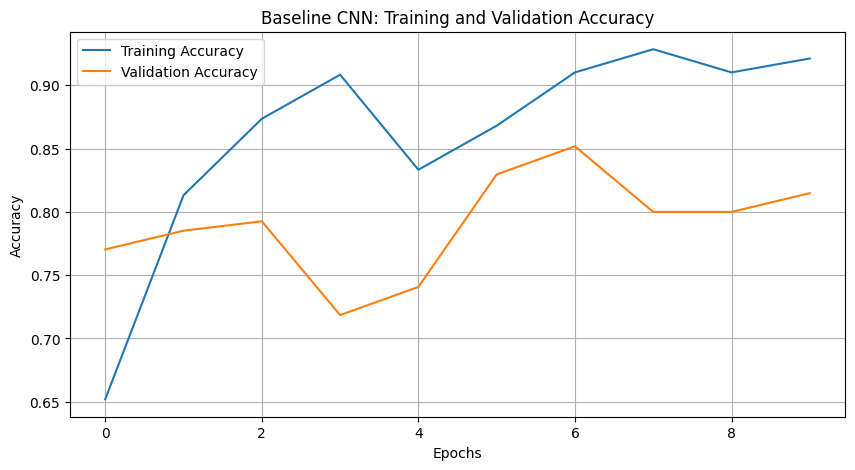

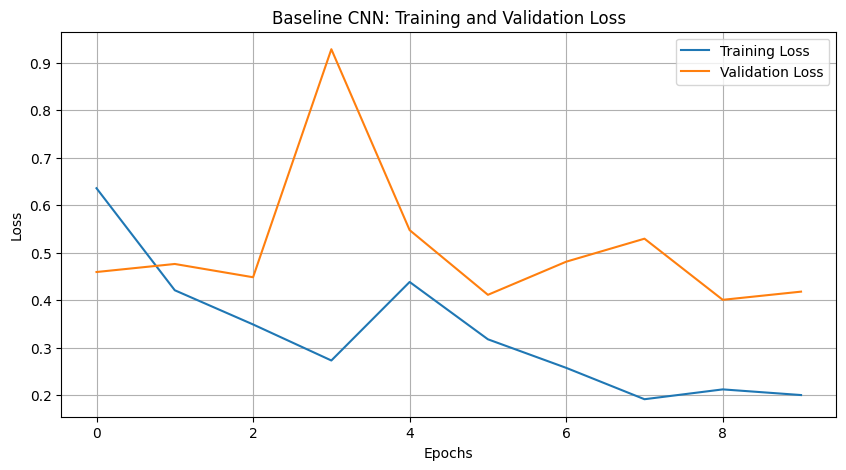

In [9]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Baseline CNN: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Baseline CNN: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step


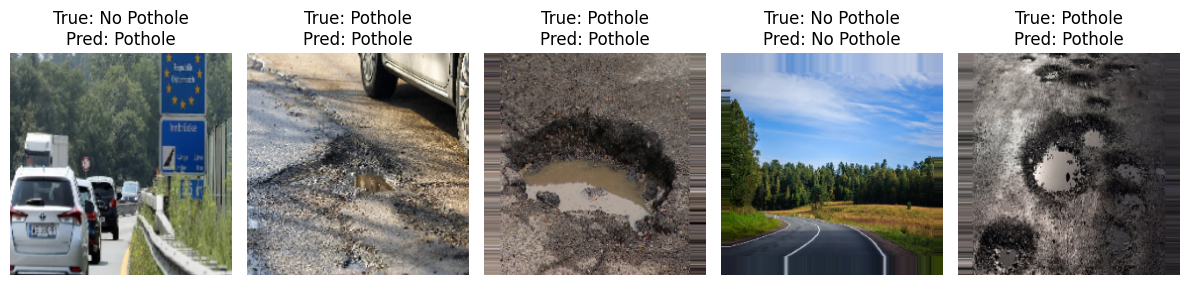

In [32]:
# Get a batch of data from the validation set
images, labels = next(iter(validation_set))

# Predict using the trained CNN model
predictions = cnn.predict(images)
predicted_classes = (predictions > 0.5).astype(int)  # Threshold for binary classification

# Plot the first 5 images along with their true and predicted labels
plt.figure(figsize=(12, 8))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(images[i])
    plt.axis("off")
    true_label = "Pothole" if labels[i] == 1 else "No Pothole"
    predicted_label = "Pothole" if predicted_classes[i] == 1 else "No Pothole"
    plt.title(f"True: {true_label}\nPred: {predicted_label}")

plt.tight_layout()
plt.show()

In [16]:
# Transfer Learning - VGG 16
vgg16 = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
vgg16.trainable = False  # Freeze the pre-trained layers

vgg16_model = tf.keras.models.Sequential([
    vgg16,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

vgg16_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg16_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,926,209 (68.38 MB)

 Trainable params: 3,211,521 (12.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [17]:
history = vgg16_model.fit(x=training_set, validation_data=validation_set, epochs=10)
results["VGG 16"] = {'accuracy': history.history['val_accuracy'][-1]}

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 440s 24s/step - accuracy: 0.5994 - loss: 1.7918 - val_accuracy: 0.8667 - val_loss: 0.2944
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 440s 24s/step - accuracy: 0.8718 - loss: 0.2950 - val_accuracy: 0.9778 - val_loss: 0.1215
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 440s 24s/step - accuracy: 0.8976 - loss: 0.2224 - val_accuracy: 0.9556 - val_loss: 0.1386
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 435s 25s/step - accuracy: 0.9368 - loss: 0.1570 - val_accuracy: 0.9778 - val_loss: 0.0922
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 436s 24s/step - accuracy: 0.9661 - loss: 0.1075 - val_accuracy: 0.9778 - val_loss: 0.0858
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 440s 25s/step - accuracy: 0.9704 - loss: 0.1049 - val_accuracy: 0.9778 - val_loss: 0.1001
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 497s 27s/step - accuracy: 0.9694 - loss: 0.0745 - val_accuracy: 0.9481 - val_loss: 0.1285
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 436s 24s/step - accuracy: 0.9733 - loss: 0.0887 - val_accuracy: 0.

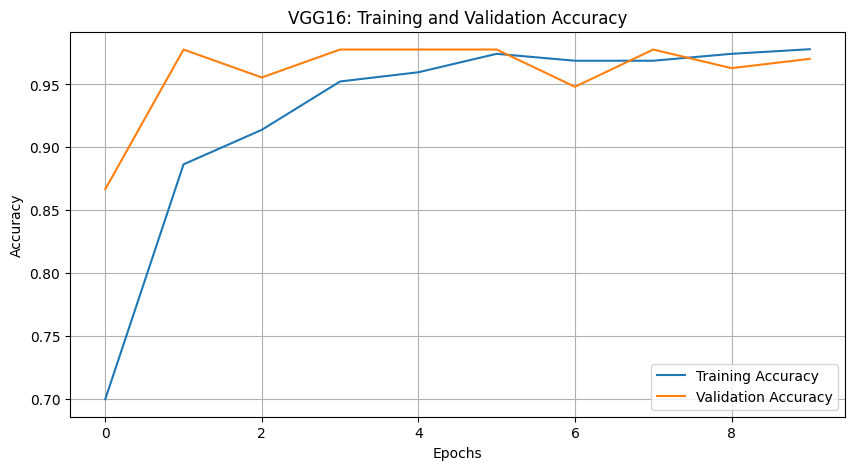

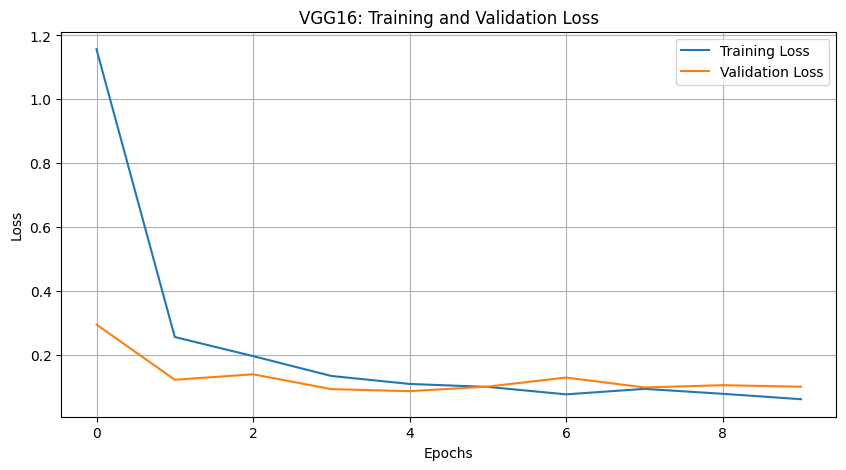

In [18]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VGG16: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
# Transfer Learning - ResNet 50
resnet50 = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
resnet50.trainable = False  # Freeze the pre-trained layers

resnet50_model = tf.keras.models.Sequential([
    resnet50,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
resnet50_model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
resnet50_model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 100352)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      12,845,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,433,025 (138.98 MB)

 Trainable params: 12,845,313 (49.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [20]:
history = resnet50_model.fit(x=training_set, validation_data=validation_set, epochs=10)
results["ResNet50"] = {'accuracy': history.history['val_accuracy'][-1]}

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 159s 8s/step - accuracy: 0.4840 - loss: 1.0317 - val_accuracy: 0.6519 - val_loss: 0.6671
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 159s 8s/step - accuracy: 0.5414 - loss: 0.7393 - val_accuracy: 0.4815 - val_loss: 0.6798
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 203s 9s/step - accuracy: 0.5717 - loss: 0.6795 - val_accuracy: 0.4815 - val_loss: 0.7094
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 189s 8s/step - accuracy: 0.5357 - loss: 0.7146 - val_accuracy: 0.5926 - val_loss: 0.6620
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 202s 8s/step - accuracy: 0.6677 - loss: 0.6407 - val_accuracy: 0.5704 - val_loss: 0.6523
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 202s 8s/step - accuracy: 0.6466 - loss: 0.6372 - val_accuracy: 0.5704 - val_loss: 0.6550
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 203s 8s/step - accuracy: 0.5958 - loss: 0.6660 - val_accuracy: 0.6000 - val_loss: 0.6518
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 146s 8s/step - accuracy: 0.5621 - loss: 0.6729 - val_accuracy: 0.5407 - v

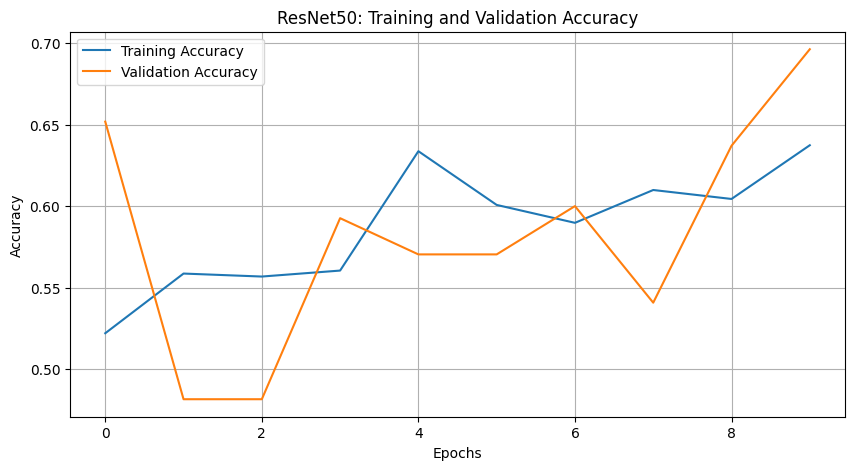

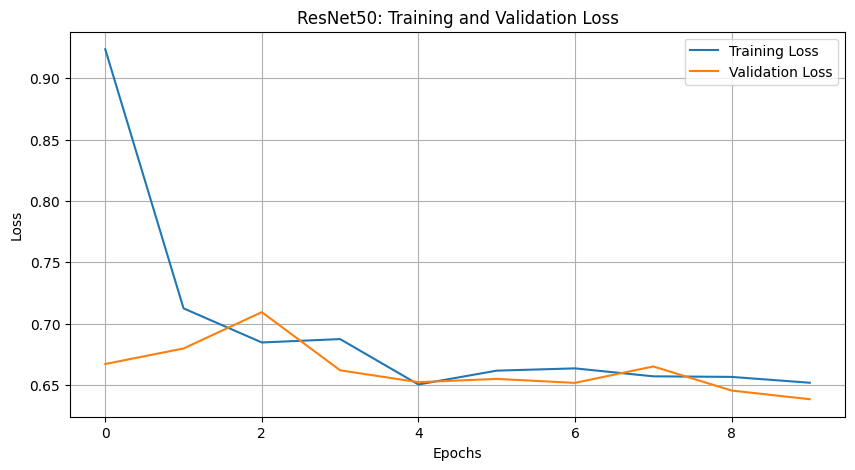

In [21]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50: Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ResNet50: Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

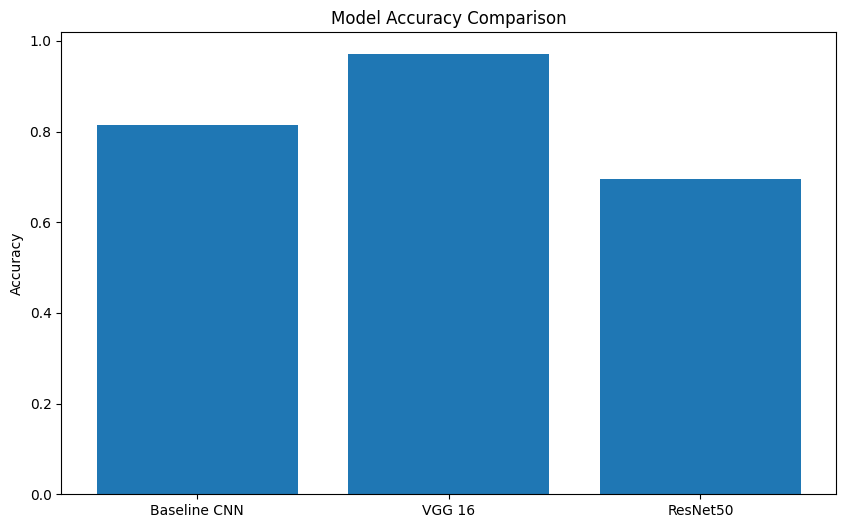

In [22]:
# Plot Accuracy Comparision Across Models
accuracies = [results[model]['accuracy'] for model in results.keys()]
plt.figure(figsize=(10,6))
plt.bar(results.keys(), accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()